In [118]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import display, HTML
# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

#import my modules
import acquire as a
import prepare as p
import wrangle_zillow as w
import explore as ex
import model as m
import evaluate as ev

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

**For this project , I use the Zillow dataset using the 2017 properties and predictions data for single unit / single family homes.**



#### Objectives for this project include:
- Identify the drivers for logerrror by using clustering methodologies.
- Document the process and analysis throughout the data science pipeline.
- Demonstrate the information that was discovered.

#### Deliverables:
- README.md file containing overall project information, how to reproduce work, and notes from project planning.
- Jupyter Notebook Report detailing the pipeline process.
- Python modules that automate the data acquistion, preparation, and exploration process.



#### Pipeline Process:

## Plan-> Acquire -> Prepare -> Explore -> Model -> Deliver

# Acquire

In [2]:
df = a.get_zillow()

In [3]:
a.summarize(df)

Dataframe shape: 
(77579, 36)
Dataframe head: 
   parcelid  basementsqft  bathroomcnt  bedroomcnt  decktypeid  \
0  14297519           NaN          3.5         4.0         NaN   
1  17052889           NaN          1.0         2.0         NaN   
2  14186244           NaN          2.0         3.0         NaN   

   calculatedfinishedsquarefeet    fips  fireplacecnt  garagecarcnt  \
0                        3100.0  6059.0           NaN           2.0   
1                        1465.0  6111.0           1.0           1.0   
2                        1243.0  6059.0           NaN           2.0   

   hashottuborspa  ...  regionidcounty  regionidzip  typeconstructiondesc  \
0             NaN  ...          1286.0      96978.0                   NaN   
1             NaN  ...          2061.0      97099.0                   NaN   
2             NaN  ...          1286.0      97078.0                   NaN   

   unitcnt  structuretaxvaluedollarcnt  landtaxvaluedollarcnt  \
0      NaN                   

Name: storydesc, dtype: int64
**propertylandusetypeid**
Unique Values :  13
 
31.0        15
246.0     2021
247.0      539
248.0      729
260.0       42
261.0    52441
263.0       74
264.0        6
265.0      335
266.0    19342
267.0       29
269.0     1947
275.0       59
Name: propertylandusetypeid, dtype: int64
**propertylandusedesc**
Unique Values :  13
 
Single Family Residential                     52441
Condominium                                   19342
Duplex (2 Units, Any Combination)              2021
Planned Unit Development                       1947
Quadruplex (4 Units, Any Combination)           729
Triplex (3 Units, Any Combination)              539
Cluster Home                                    335
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       59
Residential General                              42
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse      

**takeaways**
- numberofstories there is one property with 6 stories , I would drop it!
- unitcnt is not needed any more. I would drop it
- there are a lot of nulls so in preparation step I will handle them

# Preparation

In [4]:
p.miss_dup_values(df)

Your selected dataframe has 36 columns.
There are 25 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


Missing Values  % of Total Values
basementsqft                           77529               99.9
storydesc                              77529               99.9
storytypeid                            77529               99.9
architecturalstyledesc                 77372               99.7
architecturalstyletypeid               77372               99.7
typeconstructiondesc                   77356               99.7
typeconstructiontypeid                 77356               99.7
decktypeid                             76965               99.2
hashottuborspa                         76040               98.0
fireplacecnt                           69290               89.3
poolcnt                                61405               79.2
numberofstories                        59980               77.3
airconditioningtypeid                  52572               67.8
airconditioningdesc                    52572               67.8
garagecarcnt                           52059               67.1
unitcnt                                26876               34.6
lotsizesquarefeet                       8258               10.6
regionidcity                            1472                1.9
yearbuilt                                270                0.3
calculatedfinishedsquarefeet             201                0.3
structuretaxvaluedollarcnt               115                0.1
regionidzip                               50                0.1
taxamount                                  5                0.0
landtaxvaluedollarcnt                      2                0.0
taxvaluedollarcnt                          1                0.0

In [119]:
#checking wrangle_zillow function
df_clean, train, validate, test= w.wrangle_zillow()

before outliers (50819, 24)
df shape --> (34126, 23)
train -> (19110, 23)
validate -> (8190, 23)
test -> (6826, 23)


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34126 entries, 2 to 77578
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   parcelid                      34126 non-null  object  
 1   bathroomcnt                   34126 non-null  float64 
 2   bedroomcnt                    34126 non-null  float64 
 3   calculatedfinishedsquarefeet  34126 non-null  float64 
 4   latitude                      34126 non-null  float64 
 5   longitude                     34126 non-null  float64 
 6   propertylandusetypeid         34126 non-null  float64 
 7   regionidcity                  34126 non-null  float64 
 8   regionidcounty                34126 non-null  float64 
 9   regionidzip                   34126 non-null  float64 
 10  structuretaxvaluedollarcnt    34126 non-null  float64 
 11  landtaxvaluedollarcnt         34126 non-null  float64 
 12  logerror                      34126 non-null  

### PLOT VARIABLE DISTRIBUTIONS

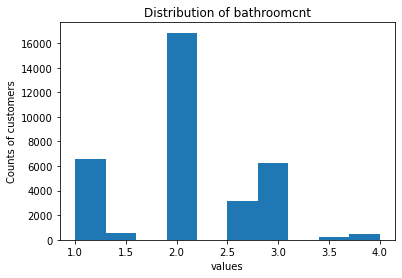

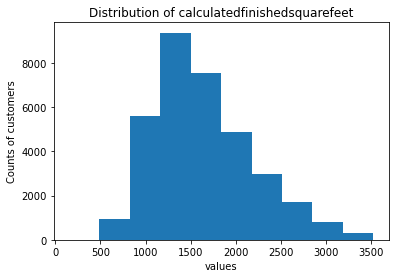

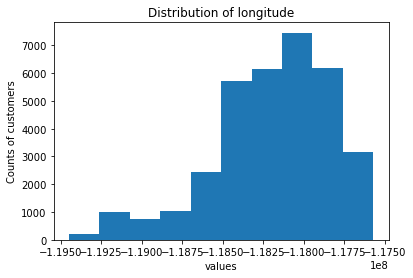

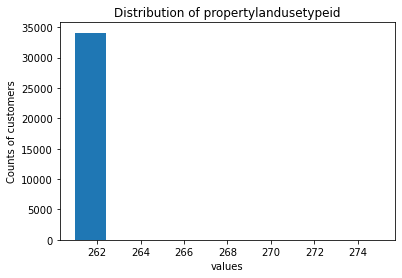

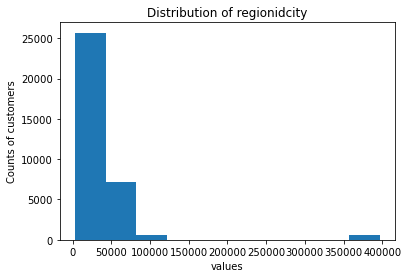

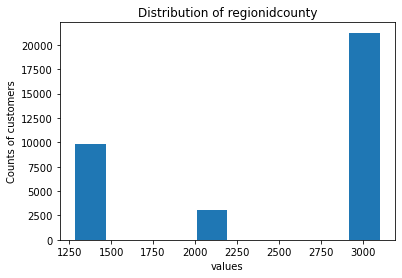

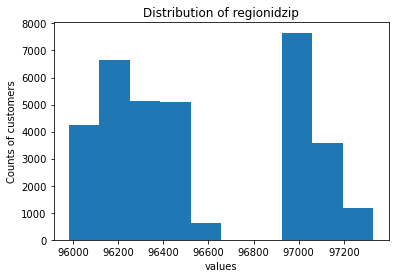

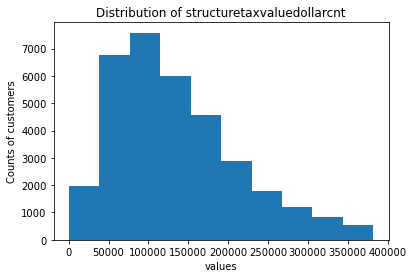

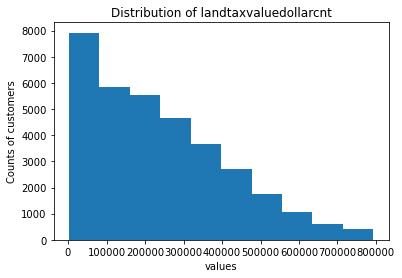

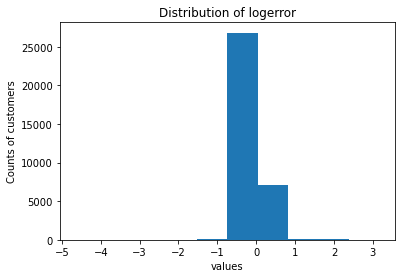

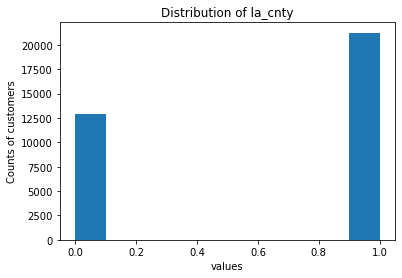

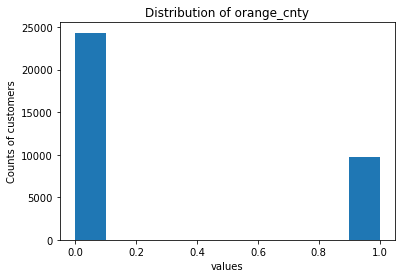

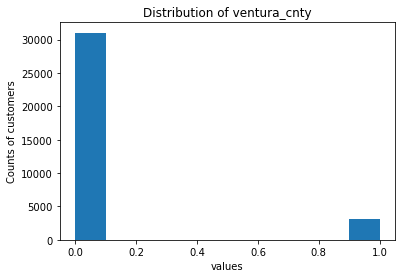

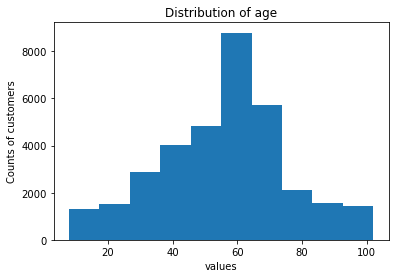

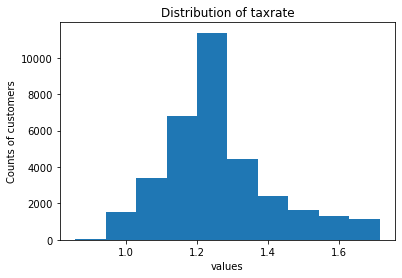

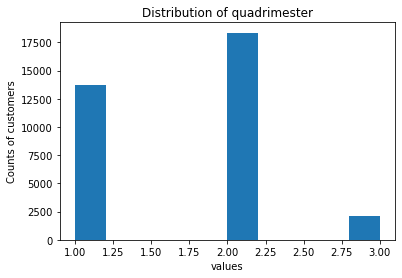

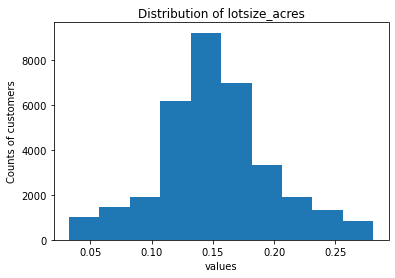

In [7]:
p.distribution(df_clean)

*takewaways**
- single unit properties
- latest  transactions 2017,
- missing values,
- create new features : age, taxrate, lotsize_acres, quadrimester, county_name
- remove outliers (removed outside 3 times IQR) 
    - 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
    - 'regionidzip', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxrate', 'lotsize_acres', 'age'
- split into train validate and test

# Explore 

### Target

In [8]:
#  I want to start exploring  my target
plt.figure(figsize=(13, 8))
train['logerror'].hist(grid=False, color = 'teal')
plt.xlabel("logerror")
plt.ylabel("Number of properties")                               
plt.xlim(-2 ,3)
plt.show()

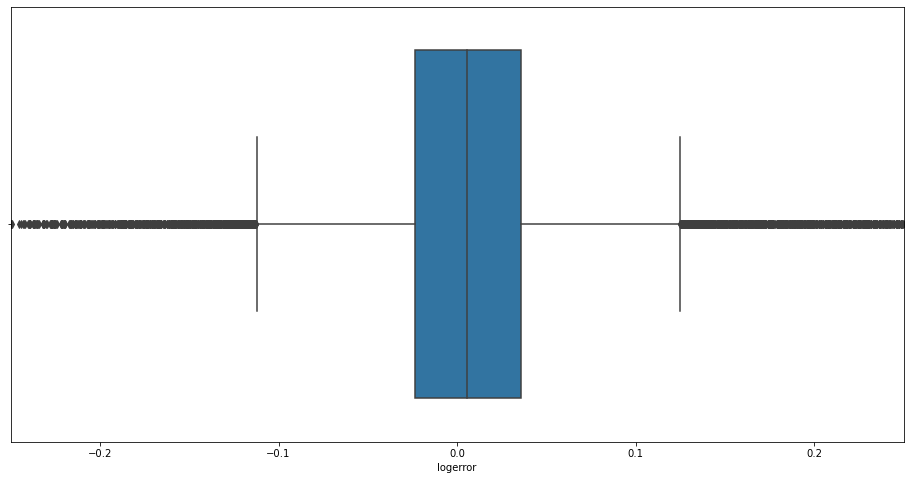

In [9]:
plt.figure(figsize=(16, 8))
sns.boxplot(train['logerror'])
plt.xlim(-.25 ,.25)
plt.show()

In [10]:
train['logerror'].describe()

count    19110.000000
mean         0.015705
std          0.156472
min         -4.453964
25%         -0.023494
50%          0.005676
75%          0.035816
max          2.876386
Name: logerror, dtype: float64

**takeaways**
- there are outliers in my target, I will continoue like this

### Explore target vs features

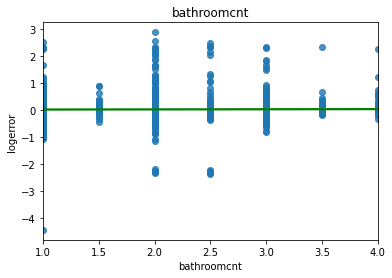

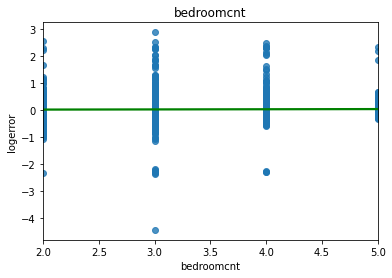

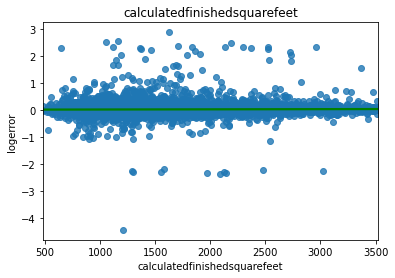

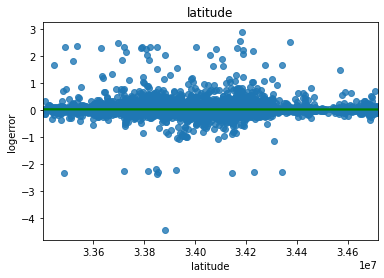

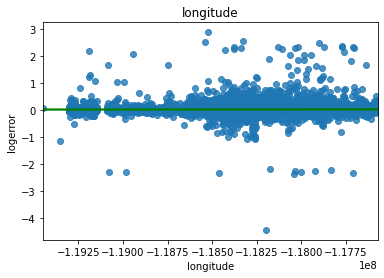

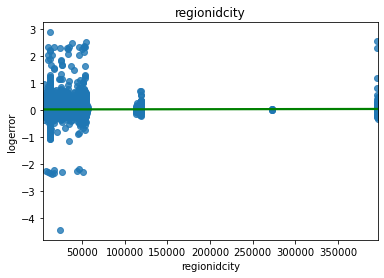

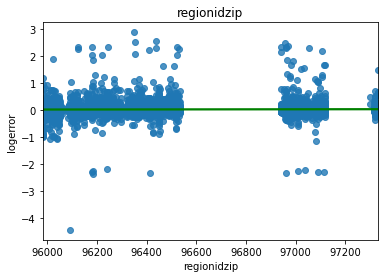

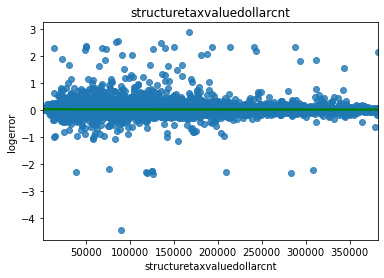

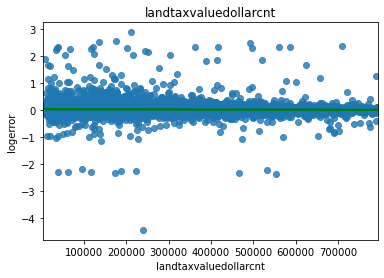

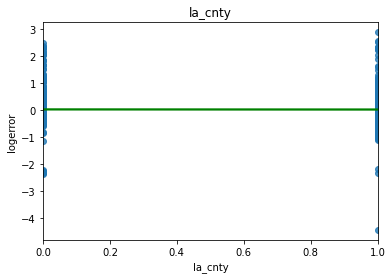

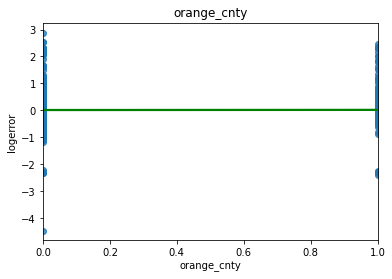

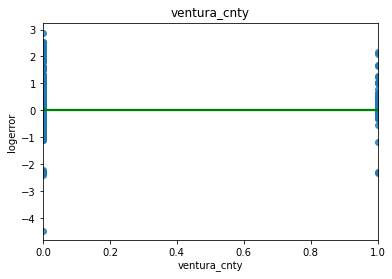

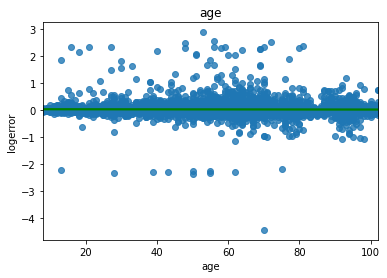

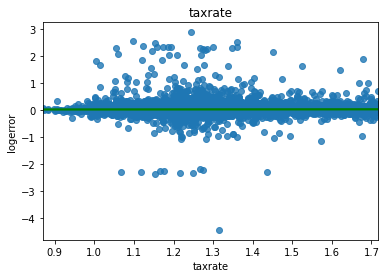

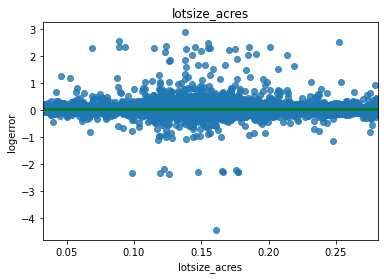

In [12]:
ex.plot_variable_pairs(train, 'logerror')

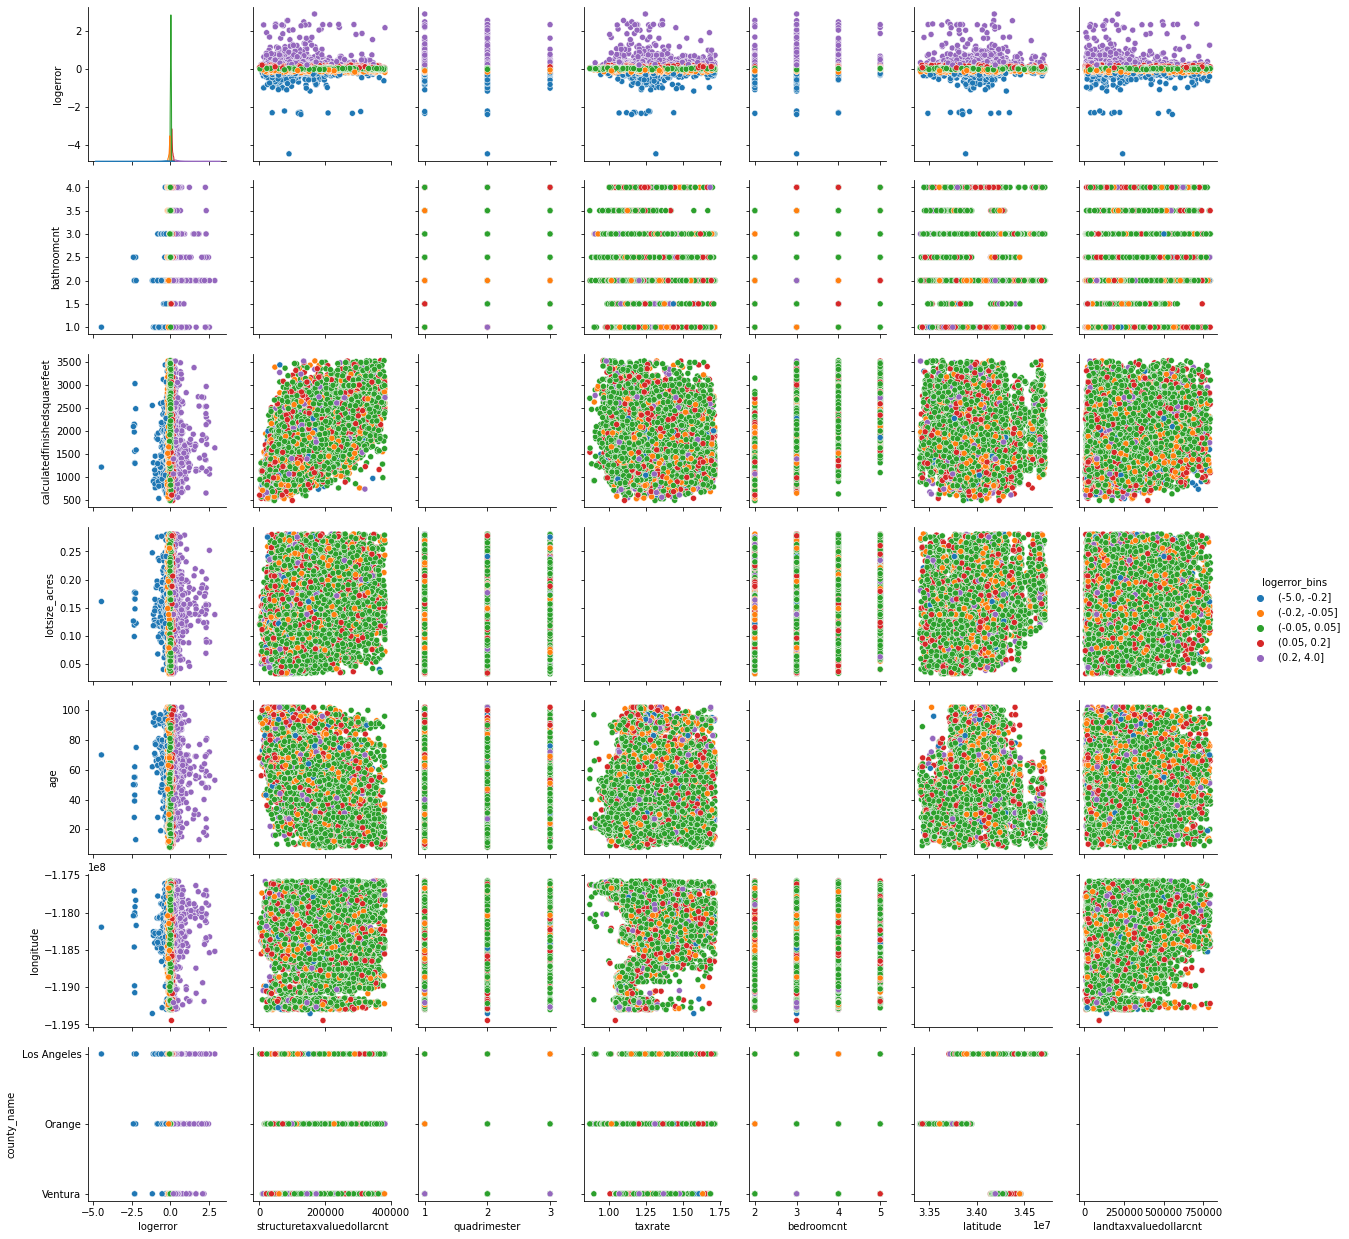

In [13]:
sns.pairplot(data = train, hue = 'logerror_bins',
             x_vars = ['logerror', 'structuretaxvaluedollarcnt', 'quadrimester', 'taxrate', 
                       'bedroomcnt','latitude','landtaxvaluedollarcnt'],
             y_vars = ['logerror', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'lotsize_acres', 'age', 'longitude', 'county_name'])

takeaways 
- the log error is low for the houses less than 20 years old  that were sold in the 2nd and 3rd quadrimester
- the range of log error is higher for the houses  that are 50 -70 years old
- the range of logerror is low for the lower and higher lot sizes
- the range of logerror is low for the lower and higher calculatedfinishedsqrefeet
- the logerror is low for the calculatedfihishedsquarefeet >1500 and with 4 bedrooms
- the logerror is low for 2.5 -3 bathrooms and were sold jan -dic
- the log error for a 5bedrooms is low with 1 -4 bathrooms except 2 bathrooms
- the range of log error in 3.5 baths is low
- 1st quadrimester  los angesles county has thwe less logerrror
- 2nd quadrimester (hot mohts) all three counties has less logerror
- 3rd quadrimester  Orange county has the less logerrror

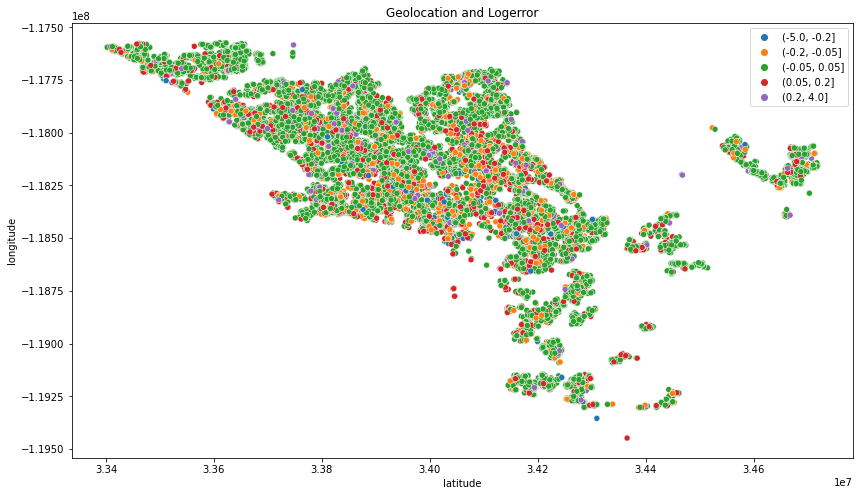

In [14]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='latitude', y='longitude', hue='logerror_bins', data=train)
plt.legend()
plt.title('Geolocation and Logerror')
plt.show()

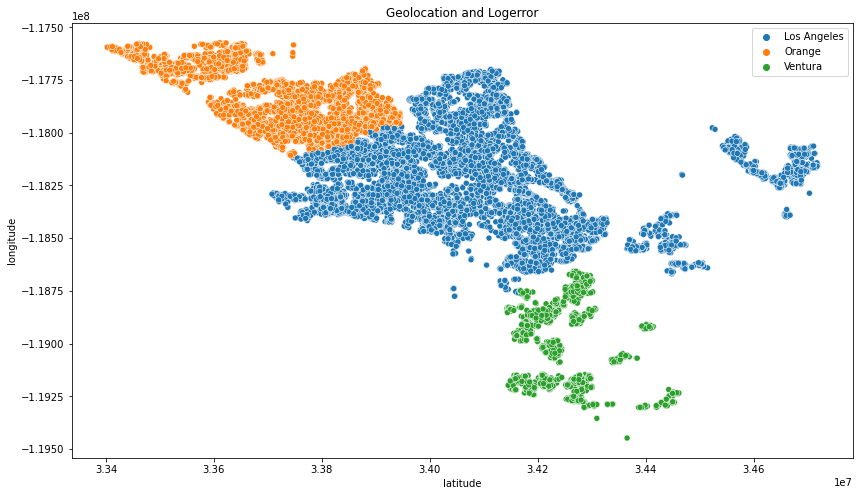

In [15]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='latitude', y='longitude', hue='county_name', data=train)
plt.legend()
plt.title('Geolocation and Logerror')
plt.show()

In [16]:
#let's focus on my target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['logerror']].sort_values(by='logerror', ascending=False), vmin=-3, vmax=3, annot=True, cmap='coolwarm')

**takeaways**

-logerror does not correlate well with any one feature

    - landtaxvaluedollarcnt is the highest

- Because of the lack of correlation, clustering is the next step.

## Statistical Tests

#### LA county vs Orange County

- T-test

- 𝐻𝑜: there is no difference in average of logerror between  Los Angeles  and Orange Counties
- 𝐻𝑎 There is a signifficant average of logerror between  Los Angeles  and Orange Counties

1. Set Significance Level: $\alpha = .05$ (in other words Confidence level is 0.95)

2. Verify Assumptions:

    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
    - Independent samples
    - Equal Variances (or set method argument to False when not)
3. Compute test statistic and probability (t-statistic & p-value) using stats.ttest_ind

In [17]:
# Set Significance Level
alpha = 0.05

In [18]:
#create my groups
la = train[train.la_cnty == 1].logerror
orange = train[train.orange_cnty ==1 ].logerror

In [19]:
#Normal Distribution
la.shape, orange.shape

((11911,), (5466,))

In [20]:
# Equal Variances (or set method argument to False when not)
la.var(), orange.var()

(0.023073818476484646, 0.027404083467743045)

In [21]:
#inequal variance

In [22]:
#Compute Test Statistic
t, p = stats.ttest_ind(la, orange, equal_var = False)
t,p

(-2.0871975888848446, 0.03689596855728124)

In [23]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### landtaxvaluedollarcnt vs logerror

- 𝐻𝑜: there is no linear relationship between  logerror and  landtaxvaluedollarcnt
- 𝐻𝑎: there is a linear relationship between  logerror and  landtaxvaluedollarcnt

**Pearson R**

In [24]:
r, p = stats.pearsonr(train['landtaxvaluedollarcnt'], train['logerror'])
r,p

(-0.03297829270878411, 5.119610685518519e-06)

In [25]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


###  Data exploration with Clusters

- **1st Clustering Combination: Clustering for age and bathrooms**

In [120]:
X = ['age', 'bedroomcnt']

In [121]:
ex.elbow_chart (train[X] , 12)

In [122]:
df, X_scaled, scaler, kmeans, centroids = ex.create_cluster(train, validate, test, X , 5 , 'cluster_age_bed')

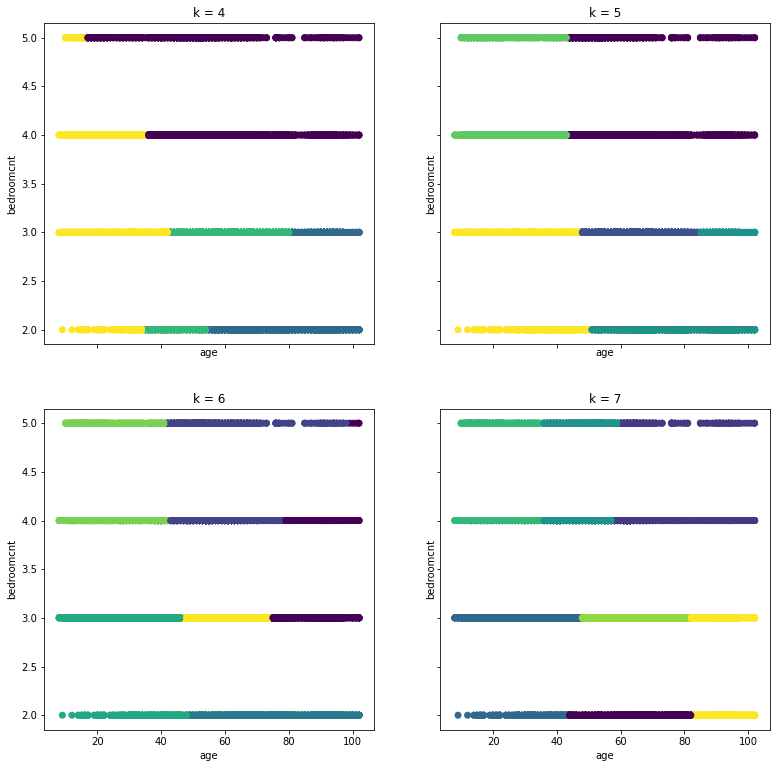

In [123]:
ex.scatter_plot_ks (train, X_scaled, 'age', 'bedroomcnt', 4, 9)

In [124]:
ex.create_scatter_plot('age','bedroomcnt',df,kmeans, X_scaled, scaler, 'cluster_age_bed')

### Statistical test

- $H_0$:  There is no  difference in the overall mean logerror and the mean of the clusters' log_errors.
- $H_a$:  There is no  difference in the overall mean logerror and the mean of the clusters' log_errors.

In [126]:
cluster0 = train[train.cluster_age_bed == 'cluster_0'].logerror
cluster1 = train[train.cluster_age_bed == 'cluster_1'].logerror
cluster2 = train[train.cluster_age_bed == 'cluster_2'].logerror
cluster3 = train[train.cluster_age_bed == 'cluster_3'].logerror
cluster4 = train[train.cluster_age_bed == 'cluster_4'].logerror

In [127]:
list_cluster = [cluster0,cluster1,cluster2,cluster3,cluster4]

In [128]:
train.logerror.mean()

0.015704631043368996

In [129]:
#let't do t-test
ex.stat_ttest (train, list_cluster, 5)

For cluster_0, We reject the null hypothesis
t = 3.5361991087882747,    p= 0.000410617654180583
For cluster_1, We fail to reject the null hypothesis
t = -1.0048889335570323,    p= 0.31498968968247015
For cluster_2, We fail to reject the null hypothesis
t = -1.9270444496129684,    p= 0.054054509652017066
For cluster_3, We fail to reject the null hypothesis
t = 1.1426282629636904,    p= 0.2533116356658754
For cluster_4, We fail to reject the null hypothesis
t = -1.39942627987784,    p= 0.16178284991565461


In [130]:
test.shape, train.shape, validate.shape

((6826, 24), (19110, 24), (8190, 24))


### - 2nd Clustering Combination: longitude  and latitude

In [131]:
X = ['latitude', 'longitude']

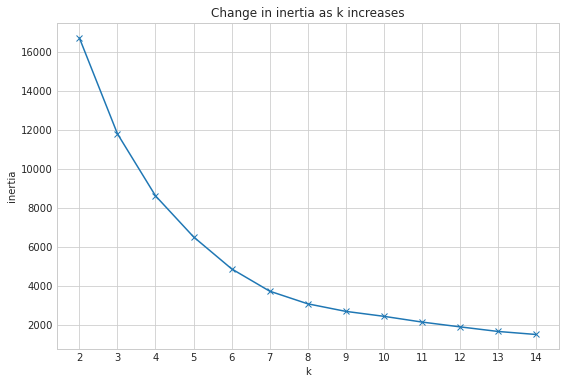

In [132]:
ex.elbow_chart (train[X] , 15)

In [133]:
df, X_scaled, scaler, kmeans, centroids = ex.create_cluster(train, validate, test, X ,4 , 'cluster_lat_long')

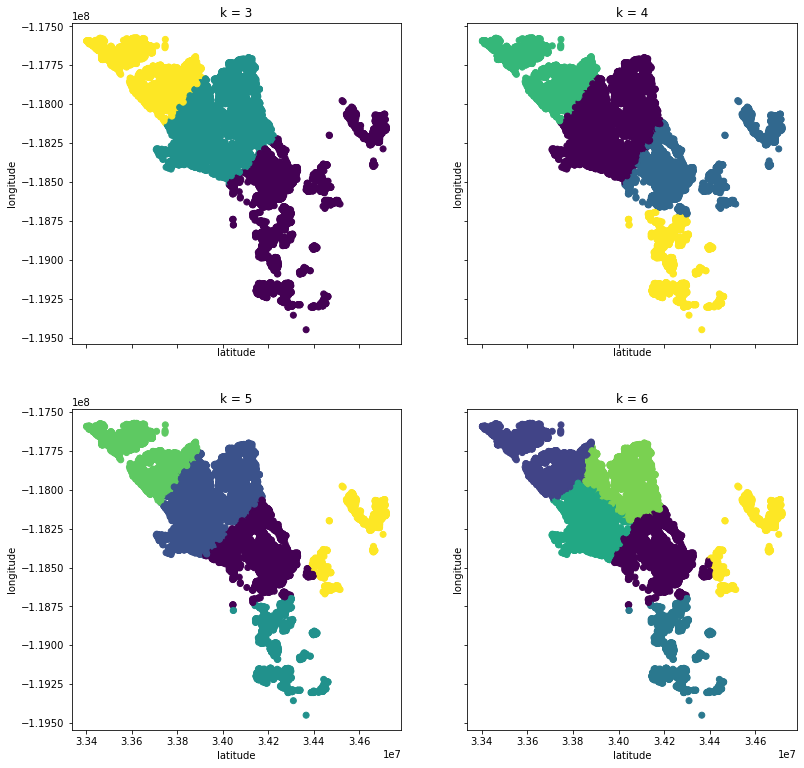

In [134]:
ex.scatter_plot_ks (train, X_scaled, 'latitude', 'longitude', 3, 7)

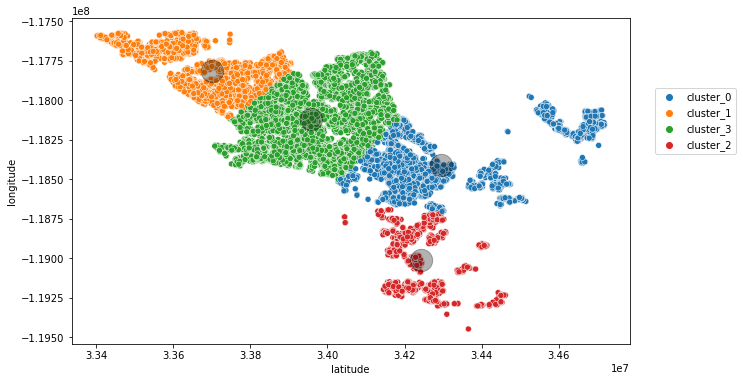

In [135]:
ex.create_scatter_plot('latitude','longitude',df,kmeans, X_scaled, scaler, 'cluster_lat_long')

###  Statistical test

- $H_0$:  There is no  difference in the overall mean error and the mean of the clusters' log_errors.
- $H_a$:  There is no  difference in the overall mean error and the mean of the clusters' log_errors.

In [136]:
cluster0 = train[train.cluster_lat_long == 'cluster_0'].logerror
cluster1 = train[train.cluster_lat_long == 'cluster_1'].logerror
cluster2 = train[train.cluster_lat_long == 'cluster_2'].logerror
cluster3 = train[train.cluster_lat_long == 'cluster_3'].logerror


In [137]:
list_cluster = [cluster0,cluster1,cluster2,cluster3]

In [138]:
ex.stat_ttest (train, list_cluster, 4)


For cluster_0, We fail to reject the null hypothesis
t = 0.942156435239411,    p= 0.3461639403814224
For cluster_1, We reject the null hypothesis
t = 1.9654416678737785,    p= 0.04942486579797325
For cluster_2, We fail to reject the null hypothesis
t = 0.26553456833653305,    p= 0.790630714752615
For cluster_3, We reject the null hypothesis
t = -1.9831177856816593,    p= 0.04738624439105686


### -  Clustering Combination: lotsize_acres vs calculatedfinishedsquarefeet

In [139]:
X = ['lotsize_acres', 'calculatedfinishedsquarefeet']

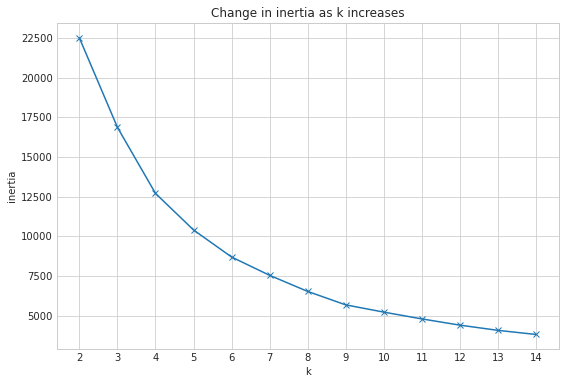

In [140]:
ex.elbow_chart (train[X] , 15)

In [141]:
df, X_scaled, scaler, kmeans, centroids = ex.create_cluster(train, validate, test, X ,4 , 'cluster_lot_finish')

In [142]:
ex.scatter_plot_ks (train, X_scaled, 'lotsize_acres','calculatedfinishedsquarefeet', 3, 7)

In [143]:
ex.create_scatter_plot('lotsize_acres','calculatedfinishedsquarefeet',df,kmeans, X_scaled, scaler, 'cluster_lot_finish')

### Statistical test

- $H_0$:  There is no  difference in the overall mean error and the mean of the clusters' log_errors.
- $H_a$:  There is no  difference in the overall mean error and the mean of the clusters' log_errors.

In [144]:
cluster0 = train[train.cluster_lot_finish == 'cluster_0'].logerror
cluster1 = train[train.cluster_lot_finish == 'cluster_1'].logerror
cluster2 = train[train.cluster_lot_finish == 'cluster_2'].logerror
cluster3 = train[train.cluster_lot_finish == 'cluster_3'].logerror

list_cluster = [cluster0,cluster1,cluster2,cluster3]

ex.stat_ttest (train, list_cluster, 4)

For cluster_0, We fail to reject the null hypothesis
t = -0.2096875333391818,    p= 0.8339267949376981
For cluster_1, We reject the null hypothesis
t = 2.265141120859151,    p= 0.023560519537329676
For cluster_2, We fail to reject the null hypothesis
t = -1.061181483908628,    p= 0.2886382906727324
For cluster_3, We fail to reject the null hypothesis
t = -0.9559430159783061,    p= 0.33915569146381586


### - Clustering Combination: quadrimester vs county_name

In [145]:
X = ['quadrimester', 'regionidzip']

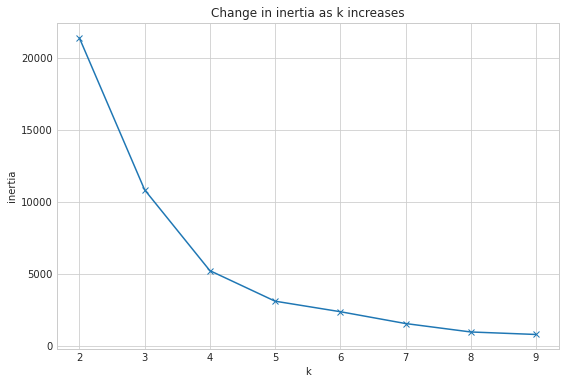

In [146]:
ex.elbow_chart (train[X] , 10)

In [147]:
df, X_scaled, scaler, kmeans, centroids = ex.create_cluster(train, validate, test, X ,4 , 'cluster_quadrimester_zipcode')

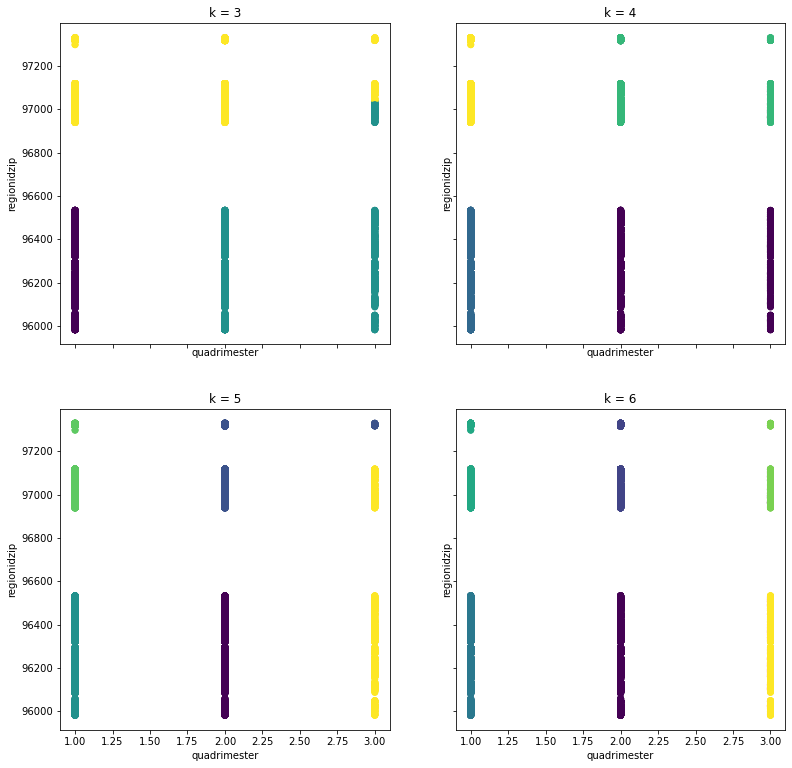

In [148]:
ex.scatter_plot_ks (train, X_scaled, 'quadrimester','regionidzip', 3, 7)

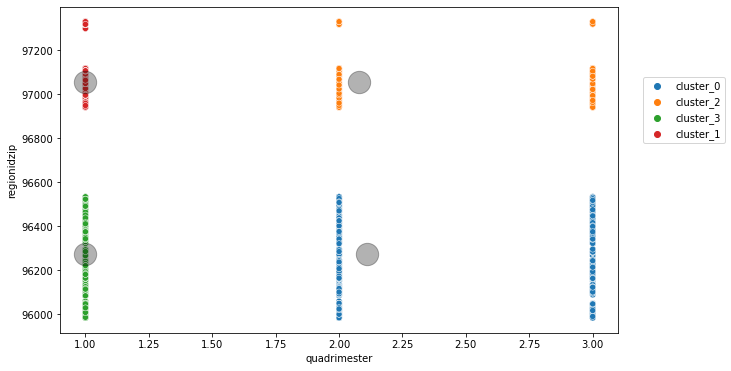

In [149]:
ex.create_scatter_plot('quadrimester','regionidzip',df,kmeans, X_scaled, scaler, 'cluster_quadrimester_zipcode')

### Statistical test

- $H_0$:  There is no  difference in the overall mean error and the mean of the clusters' log_errors.
- $H_a$:  There is no  difference in the overall mean error and the mean of the clusters' log_errors.

In [150]:
cluster0 = train[train.cluster_quadrimester_zipcode == 'cluster_0'].logerror
cluster1 = train[train.cluster_quadrimester_zipcode == 'cluster_1'].logerror
cluster2 = train[train.cluster_quadrimester_zipcode == 'cluster_2'].logerror
cluster3 = train[train.cluster_quadrimester_zipcode == 'cluster_3'].logerror

list_cluster = [cluster0,cluster1,cluster2,cluster3]

ex.stat_ttest (train, list_cluster, 4)

For cluster_0, We fail to reject the null hypothesis
t = -1.739682516253509,    p= 0.0819570663687703
For cluster_1, We fail to reject the null hypothesis
t = 0.768941748996306,    p= 0.44199214892246275
For cluster_2, We fail to reject the null hypothesis
t = 0.9986197847249751,    p= 0.3180378731022285
For cluster_3, We fail to reject the null hypothesis
t = 1.0519904597895977,    p= 0.2928557383513192


### -Clustering Combination 'age', 'calculatedfinishedsquarefeet'

In [151]:
X = ['age', 'calculatedfinishedsquarefeet']

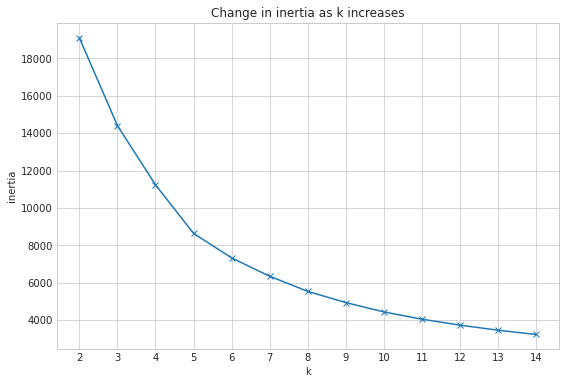

In [152]:
ex.elbow_chart (train[X] , 15)

In [153]:
df, X_scaled, scaler, kmeans, centroids = ex.create_cluster(train, validate, test, X ,5 , 'cluster_age_sqft')

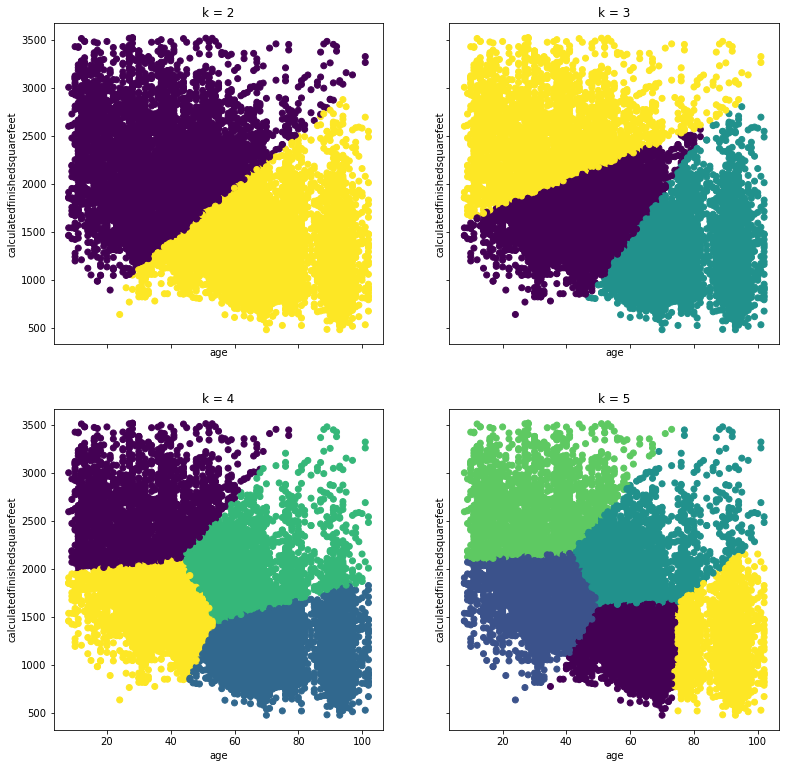

In [154]:
ex.scatter_plot_ks (train, X_scaled, 'age', 'calculatedfinishedsquarefeet', 2, 7)

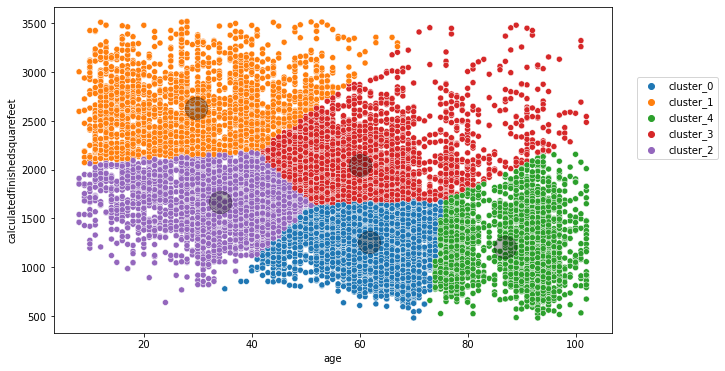

In [155]:
ex.create_scatter_plot('age', 'calculatedfinishedsquarefeet',df,kmeans, X_scaled, scaler, 'cluster_age_sqft')

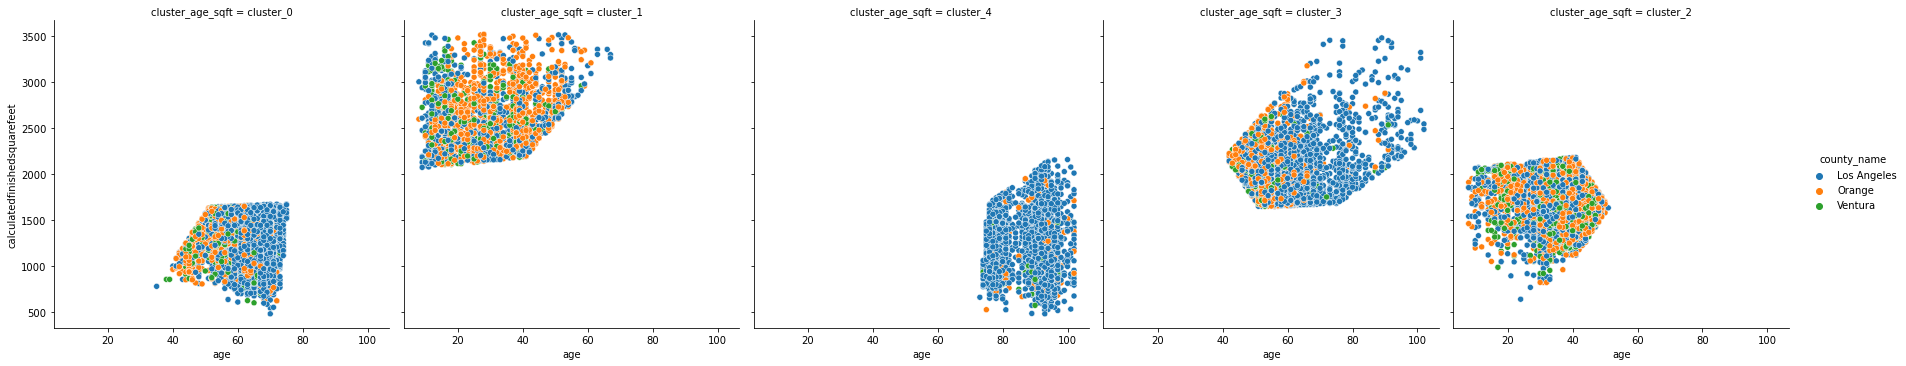

In [156]:
sns.relplot(x = 'age', y = 'calculatedfinishedsquarefeet', data = df, col = 'cluster_age_sqft', hue = 'county_name')

### Statistical test

- $H_0$:  There is no  difference in the overall mean error and the mean of the clusters' log_errors.
- $H_a$:  There is no  difference in the overall mean error and the mean of the clusters' log_errors.

In [157]:
cluster0 = train[train.cluster_age_sqft == 'cluster_0'].logerror
cluster1 = train[train.cluster_age_sqft == 'cluster_1'].logerror
cluster2 = train[train.cluster_age_sqft == 'cluster_2'].logerror
cluster3 = train[train.cluster_age_sqft == 'cluster_3'].logerror
cluster4 = train[train.cluster_age_sqft == 'cluster_4'].logerror

list_cluster = [cluster0,cluster1,cluster2,cluster3,cluster4]

ex.stat_ttest (train, list_cluster, 5)

For cluster_0, We fail to reject the null hypothesis
t = -0.06843684133722643,    p= 0.9454397850453974
For cluster_1, We reject the null hypothesis
t = 2.458212583007908,    p= 0.014036610545562603
For cluster_2, We fail to reject the null hypothesis
t = -1.2048215564457831,    p= 0.22835349300968108
For cluster_3, We fail to reject the null hypothesis
t = 1.4697992497460146,    p= 0.14170150133486697
For cluster_4, We reject the null hypothesis
t = -2.7393896199203245,    p= 0.006201198944741097


**takeaways**
- for the cluster age vs bedroom Clusters 0 is a  good candidate for modeling
- for the cluster latitude vs longitude Clusters 1,3  are   good candidates for modeling
- for the cluster  lotsize_acres vs calculatedfinishedsquarefeet Clusters 1 is a  good candidate for modeling
- for the cluster age', 'calculatedfinishedsquarefeet Clusters 1,4 are   good candidates for modeling



# Modeling

In [158]:
# create dummies for clusters

In [159]:
#create a list of columns
list_cluster = train.columns.to_list()

In [160]:
#get only clusters columns
cat_var = list_cluster[-5:]
cat_var

['cluster_age_bed',
 'cluster_lat_long',
 'cluster_lot_finish',
 'cluster_quadrimester_zipcode',
 'cluster_age_sqft']

In [161]:
train.shape, validate.shape, test.shape

((19110, 28), (8190, 28), (6826, 28))

#### create dummies for train, validate, test

In [162]:
#train
dummies =  pd.get_dummies(train[cat_var])
train = pd.concat([train, dummies], axis=1)
train = train.drop(columns=cat_var)

#validate
dummies =  pd.get_dummies(validate[cat_var])
validate = pd.concat([validate, dummies], axis=1)
validate = validate.drop(columns=cat_var)

#test
dummies =  pd.get_dummies(test[cat_var])
test = pd.concat([test, dummies], axis=1)
test = test.drop(columns=cat_var)

In [163]:
train.shape, validate.shape, test.shape

((19110, 45), (8190, 45), (6826, 45))

In [164]:
#split features from target
X_train, y_train, X_validate, y_validate, X_test, y_test =p.split_Xy(train, validate, test, 'logerror')

X_train -> (19110, 44)               y_train->(19110,)
X_validate -> (8190, 44)         y_validate->(8190,) 
X_test -> (6826, 44)                  y_test>(6826,)


In [165]:
#conver y_train y _ validate to df
y_train = pd.DataFrame( {'actual': y_train})
y_validate = pd.DataFrame( {'actual': y_validate})
y_test = pd.DataFrame( {'actual': y_test})

## Baseline

In [330]:
#create baseline using mean (I'm using my function to calculate rmse)
tra_m = m.baseline_errors(y_train, 'actual', 'mean')
tra_m['rmse']

0.15646778738228076

In [331]:
#let's calculate baseline in validate
val_m = m.baseline_errors(y_validate, 'actual', 'mean')
val_m['rmse']

0.16247094513192856

In [332]:
#create a df to save all the metrics
metric_df = pd.DataFrame(data = [{
    'model': 'mean_baseline',
    'rmse_train' : tra_m['rmse'],
    'rmse_validate': val_m['rmse'],
    'rmse_difference' : abs(round(tra_m['rmse'] - val_m['rmse'], 4)),
    'r^2_validate' : val_m['r2']}])

In [333]:
metric_df

model  rmse_train  rmse_validate  rmse_difference  r^2_validate
0  mean_baseline    0.156468       0.162471            0.006           0.0

#### Select the features that I want to use in my models

From explore we got this:
- for the cluster age vs bedroom Clusters 0 is a good candidate for modeling
- for the cluster latitude vs longitud Clusters 1,3 are good candidates for modeling
- for the cluster lotsize_acres vs calculatedfinishedsquarefeet Clusters 1 is a good candidate for modeling
- for the cluster age', 'calculatedfinishedsquarefeet Clusters 1,4 are good candidates for modeling

In [334]:
#let see again heatmap but with clusters
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['logerror']].sort_values(by='logerror', ascending=False), vmin=-3, vmax=3, annot=True, cmap='coolwarm')

In [335]:
#select features
features = ['cluster_age_bed_cluster_0','cluster_lat_long_cluster_1', 'cluster_lat_long_cluster_3', 'cluster_lot_finish_cluster_1',
             'cluster_age_sqft_cluster_1', 'cluster_age_sqft_cluster_4', 'bedroomcnt', 'calculatedfinishedsquarefeet']

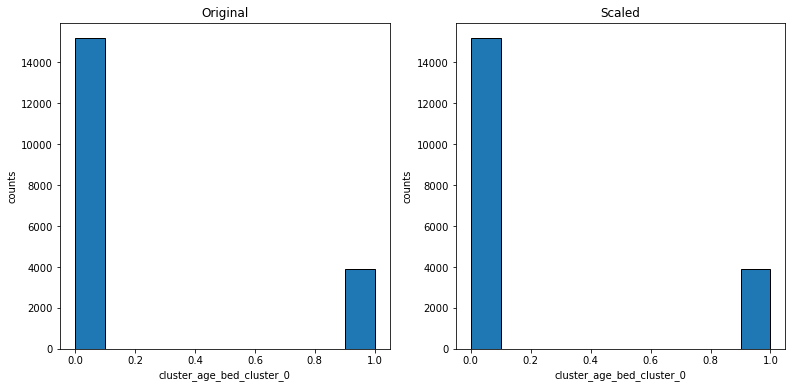

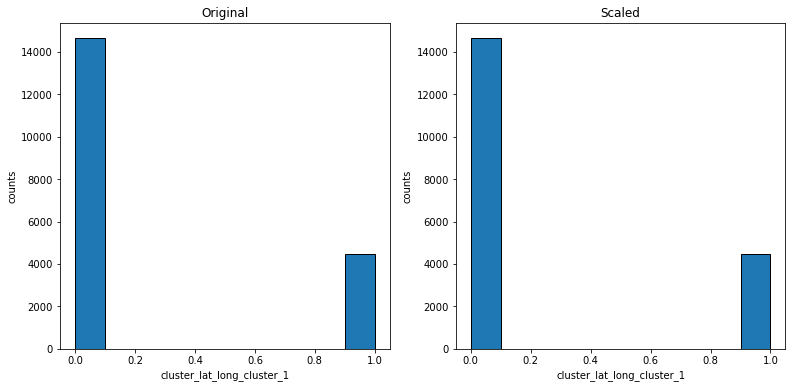

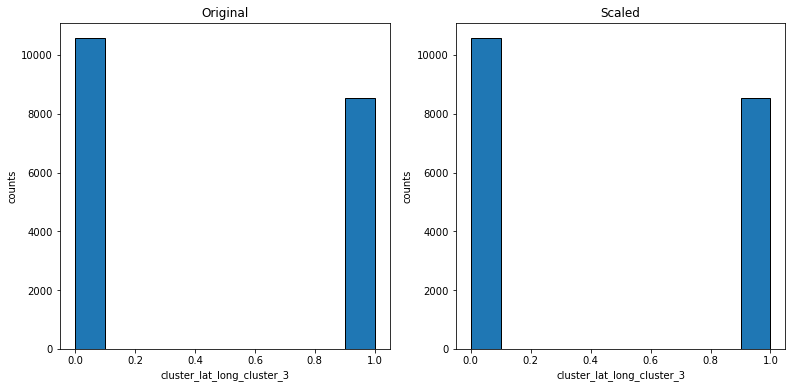

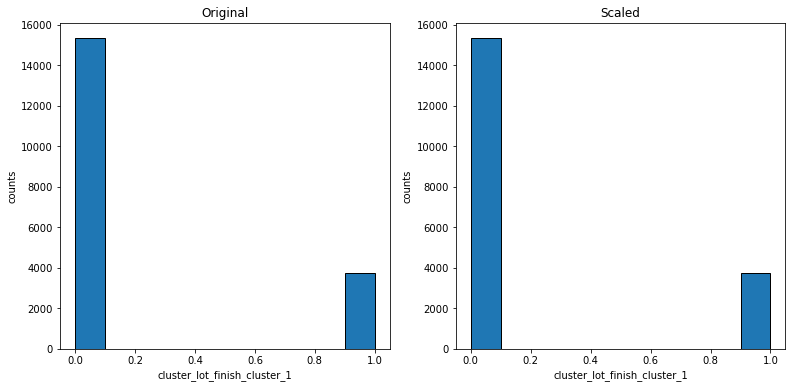

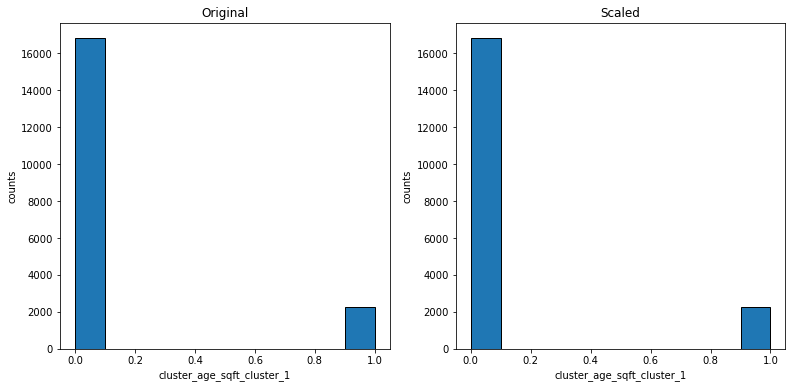

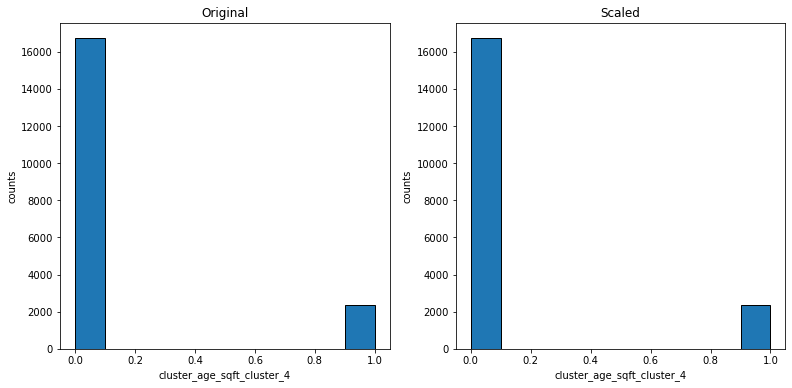

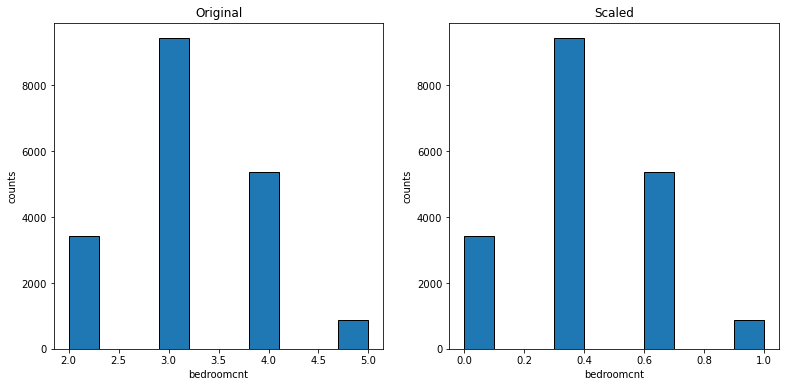

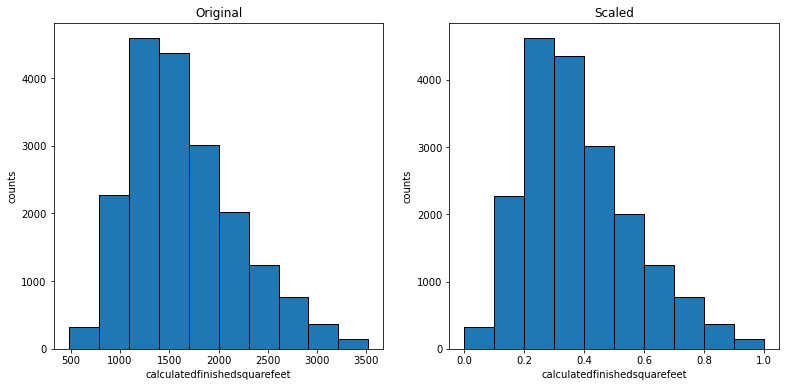

In [336]:
#scale only the features
train_scaled_df, validate_scaled_df, test_scaled_df = p.scaled_df(X_train[features] , X_validate[features], X_test[features], features, MinMaxScaler())

In [337]:
#select features with RFE
top_rfe = m.select_rfe(train_scaled_df, y_train, 4,  LassoLars(alpha=1, random_state =123) )
top_rfe

The top 4 selected feautures based on the the RFE class class are: ['cluster_age_sqft_cluster_1', 'cluster_age_sqft_cluster_4', 'bedroomcnt', 'calculatedfinishedsquarefeet']
cluster_age_sqft_cluster_1      1
cluster_age_sqft_cluster_4      1
bedroomcnt                      1
calculatedfinishedsquarefeet    1
cluster_lot_finish_cluster_1    2
cluster_lat_long_cluster_3      3
cluster_lat_long_cluster_1      4
cluster_age_bed_cluster_0       5
dtype: int64


['cluster_age_sqft_cluster_1',
 'cluster_age_sqft_cluster_4',
 'bedroomcnt',
 'calculatedfinishedsquarefeet']

##  LinearRegression (OLS)

In [338]:
#create a model
ols_rfe = m.create_model(train_scaled_df[top_rfe], y_train, 'actual', LinearRegression(normalize=True), 'modelOLS' )
ols_rfe['rmse']

0.15637045796603907

In [339]:

#I will calculate validate with top_rfe 
ols_val = m.create_model(validate_scaled_df[top_rfe], y_validate, 'actual', LinearRegression(normalize=True), 'modelOLS' )

In [340]:
print('Train rmse:  ',ols_rfe['rmse'])
print('validate rmse', ols_val['rmse'])

Train rmse:   0.15637045796603907
validate rmse 0.16235479731722519


In [341]:
#save metrics in df
metric_df = metric_df.append(
    {
    'model': 'ols',
    'rmse_train': ols_rfe['rmse'],    
    'rmse_validate': ols_val['rmse'],
    'rmse_difference' : abs(round(ols_rfe['rmse'] - ols_val['rmse'], 4)),
    'r^2_validate' : ols_val['r2']}, ignore_index=True)

In [342]:
metric_df

model  rmse_train  rmse_validate  rmse_difference  r^2_validate
0  mean_baseline    0.156468       0.162471            0.006      0.000000
1            ols    0.156370       0.162355            0.006      0.001429

## LassoLars

In [343]:
#create a model
lasso = m.create_model(train_scaled_df[top_rfe], y_train, 'actual', LassoLars(alpha=1, random_state =123), 'model_lasso' )
lasso['rmse']

0.15646778738228076

In [344]:
#get rmse in validatre
lassoval = m.create_model(validate_scaled_df[top_rfe], y_validate, 'actual', LassoLars(alpha=1, random_state=123), 'model_lasso' )
lassoval['rmse']

0.16247094513192856

In [345]:
print('Train rmse:  ',lasso['rmse'])
print('validate rmse', lassoval['rmse'])

Train rmse:   0.15646778738228076
validate rmse 0.16247094513192856


In [346]:
#save metrics in df
metric_df = metric_df.append(
    {
    'model': 'lasso',
    'rmse_train': lasso['rmse'],
    'rmse_validate': lassoval['rmse'],
    'rmse_difference' :abs( round(lasso['rmse'] - lassoval['rmse'], 4)),
    'r^2_validate' : lassoval['r2']}, ignore_index = True)

In [347]:
metric_df

model  rmse_train  rmse_validate  rmse_difference  r^2_validate
0  mean_baseline    0.156468       0.162471            0.006  0.000000e+00
1            ols    0.156370       0.162355            0.006  1.429256e-03
2          lasso    0.156468       0.162471            0.006  2.412264e-31

## TweedieRegressor (GLM)

In [348]:
#create a model
glm_train = m.create_model(train_scaled_df[top_rfe], y_train, 
                           'actual', TweedieRegressor(power=0, alpha=0), 'model_glm' )

In [349]:
#validate
glm_val = m.create_model(validate_scaled_df[top_rfe], y_validate, 
                         'actual', TweedieRegressor(power=0, alpha=0), 'model_glm' )

In [350]:
print('Train rmse:  ',glm_train['rmse'])
print('validate rmse', glm_val['rmse'])

Train rmse:   0.1563709875871793
validate rmse 0.16235479946127104


In [351]:
metric_df = metric_df.append(
    {
    'model': 'glm',
    'rmse_train' : glm_train['rmse'],   
    'rmse_validate': glm_val['rmse'],
    'rmse_difference' : abs(round(glm_train['rmse'] - glm_val['rmse'], 4)),
    'r^2_validate' : glm_val['r2']}, ignore_index = True)

In [352]:
metric_df

model  rmse_train  rmse_validate  rmse_difference  r^2_validate
0  mean_baseline    0.156468       0.162471            0.006  0.000000e+00
1            ols    0.156370       0.162355            0.006  1.429256e-03
2          lasso    0.156468       0.162471            0.006  2.412264e-31
3            glm    0.156371       0.162355            0.006  1.436922e-03

## Polynomial Regression

In [353]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree = 6) 

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(train_scaled_df)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(validate_scaled_df)
X_test_degree3 = pf.transform(test_scaled_df)

In [354]:
#create a model with train
pol_reg_train =  m.create_model(X_train_degree3, y_train, 
                                'actual', LinearRegression(normalize=True), 'model_polreg' )

In [355]:
#validate
pol_reg_val =  m.create_model(X_validate_degree3, 
                              y_validate, 'actual',LinearRegression(normalize=True), 'model_polreg' )

In [356]:
print('Train rmse:  ',pol_reg_train['rmse'])
print('validate rmse', pol_reg_val['rmse'])

Train rmse:   0.1538713535526312
validate rmse 0.15782587497554992


In [357]:
metric_df = metric_df.append(
    {
    'model': 'pol_reg',
    'rmse_train': pol_reg_train['rmse'],
    'rmse_validate': pol_reg_val['rmse'],
    'rmse_difference' : abs(round(pol_reg_train['rmse'] - pol_reg_val['rmse'], 4)),
    'r^2_validate' : pol_reg_val['r2']},  ignore_index = True)

In [358]:
metric_df

model  rmse_train  rmse_validate  rmse_difference  r^2_validate
0  mean_baseline    0.156468       0.162471            0.006  0.000000e+00
1            ols    0.156370       0.162355            0.006  1.429256e-03
2          lasso    0.156468       0.162471            0.006  2.412264e-31
3            glm    0.156371       0.162355            0.006  1.436922e-03
4        pol_reg    0.153871       0.157826            0.004  8.140115e-02

In [359]:
#I use this function that gives me a report based on metric_df
ev.report(metric_df)

These are the models that perform better than our baseline rmse: 0.16247094513192856


-----------------------------------------------------------------------------------------------
   ********** The model with the less  rmse_validate  is pol_reg  rmse:0.16 **********             
-----------------------------------------------------------------------------------------------
 
The model with r^2 validate closer to 1 is  pol_reg


## Test the best model

In [360]:
#use my function to create and calculate the metrics
pol_reg_test =  m.create_model(X_test_degree3, 
                              y_test, 'actual',LinearRegression(normalize=True), 'model_polreg' )

In [361]:
#I;m goung to create a new table only with my baseline and my best model
best_model = metric_df.drop([1,2,3], axis= 0)
best_model

model  rmse_train  rmse_validate  rmse_difference  r^2_validate
0  mean_baseline    0.156468       0.162471            0.006      0.000000
4        pol_reg    0.153871       0.157826            0.004      0.081401

In [362]:
#add the resutl of test
best_model[' rmse_test'] =  pol_reg_test['rmse']
best_model.iloc[0,5] = 0

In [363]:
best_model

model  rmse_train  rmse_validate  rmse_difference  r^2_validate  \
0  mean_baseline    0.156468       0.162471            0.006      0.000000   
4        pol_reg    0.153871       0.157826            0.004      0.081401   

    rmse_test  
0    0.000000  
4    0.157698

**Takeaways**
- My best model did not perform better than my baseline

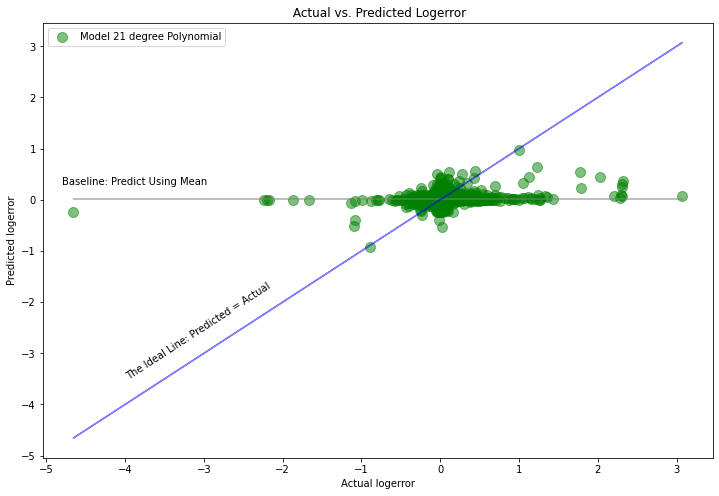

In [364]:

plt.figure(figsize=(12,8))
plt.plot(y_validate.actual, y_validate.yhat_baseline_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", ( -4.8, .3))
plt.plot(y_validate.actual, y_validate.actual, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (-4, -3.5), rotation=33)
#these are my oder models if I want to see them too
#plt.scatter(y_validate.actual, y_validate.modelOLS, 
#           alpha=.5, color="red", s=100, label="Model: LinearRegression")
#plt.scatter(y_validate.actual, y_validate.model_lasso, 
#            alpha=.5, color="blue", s=100, label="Model: LASSO")
#plt.scatter(y_validate.actual, y_validate.model_glm, 
#            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.actual, y_validate.model_polreg, 
            alpha=.5, color="green", s=100, label="Model 21 degree Polynomial")
plt.legend()
plt.xlabel("Actual logerror")
plt.ylabel("Predicted logerror")
plt.yscale(value = 'linear')
plt.title(" Actual vs. Predicted Logerror")

plt.show()

# Create a model without clusters

In [365]:
new_features= ['calculatedfinishedsquarefeet', 'taxrate', 'landtaxvaluedollarcnt', 'bedroomcnt']

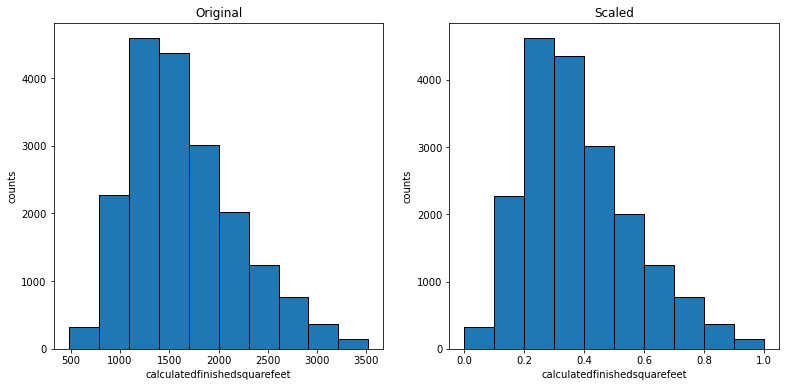

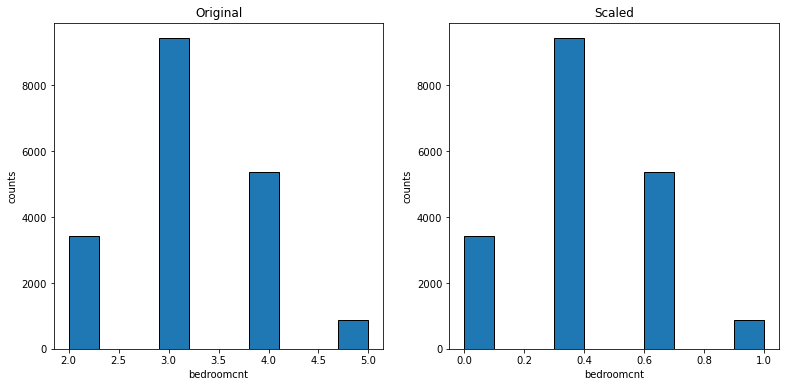

In [366]:
# scale only the features
train_scaled, validate_scaled, test_scaled = p.scaled_df(X_train[new_features] , X_validate[new_features], X_test[new_features], new_features, MinMaxScaler())

### LinearRegression (OLS)

In [367]:
#create a model
ols_rfe2 = m.create_model(train_scaled, y_train, 'actual', LinearRegression(normalize=True), 'modelOLS' )
ols_rfe2['rmse']

0.1562838818142695

In [368]:
#with clusters
ols_rfe['rmse']

0.15637045796603907

In [369]:
# there is a minimal difference between model with clusters and wihtout

### Polynomial Regression

In [370]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree = 6) 

# fit and transform X_train_scaled
X_train_degree6 = pf.fit_transform(train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree6 = pf.transform(validate_scaled)
X_test_degree6 = pf.transform(test_scaled)

In [371]:
#create a model with train
pol_reg_train2 =  m.create_model(X_train_degree3, y_train, 
                                'actual', LinearRegression(normalize=True), 'model_polreg' )

In [372]:
#validate
pol_reg_val2 =  m.create_model(X_validate_degree3, 
                              y_validate, 'actual',LinearRegression(normalize=True), 'model_polreg' )

In [373]:
#test
pol_reg_test2 =  m.create_model(X_test_degree3, 
                              y_test, 'actual',LinearRegression(normalize=True), 'model_polreg' )

In [374]:
print('Train rmse:  ',pol_reg_train2['rmse'])
print('validate rmse', pol_reg_val2['rmse'])
print('test rmse', pol_reg_test2['rmse'])

Train rmse:   0.1538713535526312
validate rmse 0.15782587497554992
test rmse 0.15769778989395636


In [375]:
print('Train rmse:  ',pol_reg_train['rmse'])
print('validate rmse', pol_reg_val['rmse'])
print('test rmse', pol_reg_test['rmse'])

Train rmse:   0.1538713535526312
validate rmse 0.15782587497554992
test rmse 0.15769778989395636


In [317]:
#add the resutl of test
metric_df = metric_df.append(
    {
    'model': 'pol_reg2',
    'rmse_train': pol_reg_train2['rmse'],
    'rmse_validate': pol_reg_val2['rmse'],
    'rmse_difference' : abs(round(pol_reg_train2['rmse'] - pol_reg_val2['rmse'], 4)),
    'r^2_validate' : pol_reg_val2['r2']},  ignore_index = True)

In [318]:
metric_df

model  rmse_train  rmse_validate  rmse_difference  r^2_validate
0  mean_baseline    0.156468       0.162471            0.006  0.000000e+00
1            ols    0.156370       0.162355            0.006  1.429256e-03
2          lasso    0.156468       0.162471            0.006  2.412264e-31
3            glm    0.156371       0.162355            0.006  1.436922e-03
4        pol_reg    0.153871       0.157826            0.004  8.140115e-02
5       pol_reg2    0.153871       0.157826            0.004  8.140115e-02

In [319]:
#add the resutl of test
best_model[' rmse_test2'] =  pol_reg_test2['rmse']

In [320]:
best_model

model  rmse_train  rmse_validate  rmse_difference  r^2_validate  \
0  mean_baseline    0.156468       0.162471            0.006      0.000000   
4        pol_reg    0.153871       0.157826            0.004      0.081401   

    rmse_test   rmse_test2  
0    0.000000     0.157698  
4    0.157698     0.157698

**The  goal of identifying the drivers for logerror by incorporating clustering methodologies did not help.**

With more time, I would like :
- create more models with different parameters
- find better  clusters to use.
- create more models without clusters
- would like to explore 3-D clustering by adding latitude.
- explore less common features and create clusters.
- fill out the missing data so that there are even more data points to work with.